# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect6. Softmax Regression

In [1]:
from images import bigpycraft_ai as bpc
from IPython.display import Image 
from tqdm import tqdm_notebook

### <font color='brown'>Softmax Classification</font>
> Multinomial classification
- hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

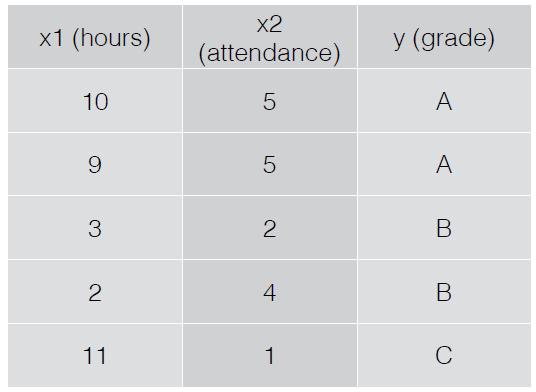

In [2]:
# Multinomial_classification_for_grade
bpc.Figure(bpc.ML06_IMG_01, 400)

In [3]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

x_data = [[10,5], [9,5], [3,2], [2,4], [11,1]]
y_data = [[1, 0, 0], 
          [1, 0, 0], 
          [0, 1, 0], 
          [0, 1, 0],
          [0, 0, 1]]

X = tf.placeholder("float", [None, 2])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([2, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]),    name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


C:\Python\Anaconda3-50\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        # print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
        print("Step : {}, \t Cost : {}".format(step, sess.run(cost, feed_dict={X: x_data, Y: y_data})))


A Jupyter Widget

Step : 0, 	 Cost : 5.044024467468262
Step : 200, 	 Cost : 0.11129350960254669
Step : 400, 	 Cost : 0.05863405019044876
Step : 600, 	 Cost : 0.039174288511276245
Step : 800, 	 Cost : 0.029238993301987648
Step : 1000, 	 Cost : 0.023261137306690216
Step : 1200, 	 Cost : 0.019285503774881363
Step : 1400, 	 Cost : 0.0164570864289999
Step : 1600, 	 Cost : 0.014344911091029644
Step : 1800, 	 Cost : 0.012708926573395729
Step : 2000, 	 Cost : 0.01140526868402958



In [5]:
# Testing & One-hot encoding
test_data = [[9.5, 5.5], 
             [9.9, 1.5], 
             [3.1, 2.1]]

pred_val = sess.run(hypothesis, feed_dict={X: test_data})
pred_idx = sess.run(tf.argmax(pred_val, 1))

# print("predict value : \n {} \n\npredict index : {}".format(pred_val, pred_idx))
print("test data : {} \n\npredict value : \n {} \n\npredict index : {}".format(test_data, pred_val, pred_idx))


test data : [[9.5, 5.5], [9.9, 1.5], [3.1, 2.1]] 

predict value : 
 [[9.89088714e-01 1.07102245e-02 2.01088842e-04]
 [2.56168135e-02 3.51882044e-08 9.74383175e-01]
 [3.70497666e-02 9.61320758e-01 1.62941683e-03]] 

predict index : [0 2 1]


In [6]:
# grade로 예측값 표기
grade = ['A', 'B', 'C']
arg_val = sess.run(tf.arg_max(pred_val, 1))
p_grade = [ grade[val] for val in arg_val ]
print(p_grade)


Instructions for updating:
Use `argmax` instead
['A', 'C', 'B']


### 좀더 복잡한 Classification

In [7]:
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1, 1], 
          [2, 1, 3, 2], 
          [3, 1, 3, 4], 
          [4, 1, 5, 5],
          [1, 7, 5, 5], 
          [1, 2, 5, 6], 
          [1, 6, 6, 6], 
          [1, 7, 7, 7]]

y_data = [[0, 0, 1], 
          [0, 0, 1], 
          [0, 0, 1], 
          [0, 1, 0],
          [0, 1, 0], 
          [0, 1, 0], 
          [1, 0, 0], 
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


In [19]:
? tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

In [8]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        # print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
        print("Step : {}, \t Cost : {}".format(step, sess.run(cost, feed_dict={X: x_data, Y: y_data})))


A Jupyter Widget

Step : 0, 	 Cost : 1.5011367797851562
Step : 200, 	 Cost : 0.5970590114593506
Step : 400, 	 Cost : 0.48563817143440247
Step : 600, 	 Cost : 0.3894888162612915
Step : 800, 	 Cost : 0.2974500060081482
Step : 1000, 	 Cost : 0.24035918712615967
Step : 1200, 	 Cost : 0.21722376346588135
Step : 1400, 	 Cost : 0.19807168841362
Step : 1600, 	 Cost : 0.18193602561950684
Step : 1800, 	 Cost : 0.16815578937530518
Step : 2000, 	 Cost : 0.156254842877388



In [9]:
# Testing & One-hot encoding
a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
print(a, '\n예측값 :', sess.run(tf.arg_max(a, 1)))

[[3.929393e-03 9.960626e-01 8.081385e-06]] 
예측값 : [1]


In [10]:
b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
print(b, '\n예측값 :', sess.run(tf.arg_max(b, 1)))

[[0.8814174  0.11073589 0.00784672]] 
예측값 : [0]


In [11]:
c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
print(c, '\n예측값 :', sess.run(tf.arg_max(c, 1)))

[[1.2968570e-08 3.4041374e-04 9.9965954e-01]] 
예측값 : [2]


In [12]:
all = sess.run(hypothesis, feed_dict={
               X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
print(all, '\n\n예측값 :', sess.run(tf.arg_max(all, 1)))

[[3.92939290e-03 9.96062577e-01 8.08138520e-06]
 [8.81417394e-01 1.10735886e-01 7.84672145e-03]
 [1.29685702e-08 3.40413739e-04 9.99659538e-01]] 

예측값 : [1 0 2]


### <font color='brown'>Animal classification with softmax_cross_entropy_with_logits</font>
> 
- Ref  : https://kr.pinterest.com/explore/animal-classification-activity/?lp=true
- Data : https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data

<!--
![Graph](./images/lab06_zoo_animal_type.png)
![Graph](./images/lab06_zoo_data.png)
//-->

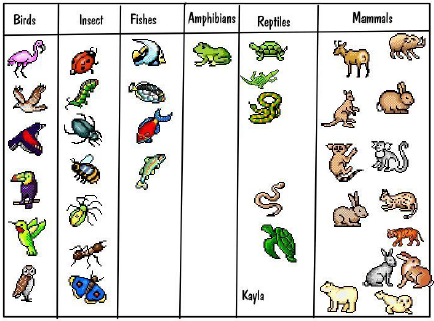

In [13]:
bpc.Figure(bpc.ML06_IMG_02)

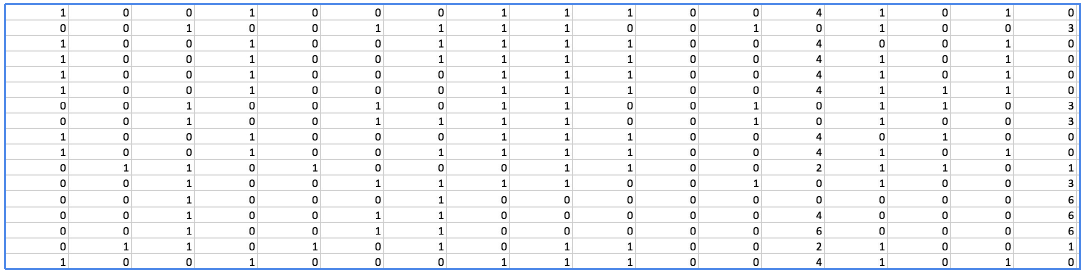

In [14]:
bpc.Figure(bpc.ML06_IMG_03)

In [2]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

# Predicting animal type based on various features
xy = np.loadtxt('./data/data-04-zoo.csv', delimiter=',', dtype=np.float32)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)
print('\nx_data :\n', x_data)
print('\ny_data :\n', y_data)

nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6

Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
print("\none_hot", Y_one_hot)

Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("\nreshape", Y_one_hot)

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Cross entropy cost/loss
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                 labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


C:\Python\Anaconda3-50\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(101, 16) (101, 1)

x_data :
 [[1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]]

y_data :
 [[0.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [3.]
 [0.]
 [0.]
 [1.]
 [3.]
 [6.]
 [6.]
 [6.]
 [1.]
 [0.]
 [3.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [5.]
 [4.]
 [4.]
 [0.]
 [0.]
 [0.]
 [5.]
 [0.]
 [0.]
 [1.]
 [3.]
 [0.]
 [0.]
 [1.]
 [3.]
 [5.]
 [5.]
 [1.]
 [5.]
 [1.]
 [0.]
 [0.]
 [6.]
 [0.]
 [0.]
 [0.]
 [0.]
 [5.]
 [4.]
 [6.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [3.]
 [3.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [6.]
 [3.]
 [0.]
 [0.]
 [2.]
 [6.]
 [1.]
 [1.]
 [2.]
 [6.]
 [3.]
 [1.]
 [0.]
 [6.]
 [3.]
 [1.]
 [5.]
 [4.]
 [2.]
 [2.]
 [3.]
 [0.]
 [0.]
 [1.]
 [0.]
 [5.]
 [0.]
 [6.]
 [1.]]

one_hot Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)

reshape Tensor("Reshape:0", shape=(?, 7), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gr

In [3]:
? tf.nn.softmax_cross_entropy_with_logits

In [16]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2000):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
    if step % 100 == 0:
        loss, acc = sess.run([cost, accuracy], feed_dict={
                             X: x_data, Y: y_data})
        print("Step: {:5}, \t Loss: {:.3f}, \t Acc: {:.2%}".format(
            step, loss, acc))


Step:     0, 	 Loss: 4.278, 	 Acc: 44.55%
Step:   100, 	 Loss: 0.739, 	 Acc: 77.23%
Step:   200, 	 Loss: 0.435, 	 Acc: 90.10%
Step:   300, 	 Loss: 0.334, 	 Acc: 91.09%
Step:   400, 	 Loss: 0.272, 	 Acc: 94.06%
Step:   500, 	 Loss: 0.230, 	 Acc: 96.04%
Step:   600, 	 Loss: 0.198, 	 Acc: 98.02%
Step:   700, 	 Loss: 0.174, 	 Acc: 98.02%
Step:   800, 	 Loss: 0.154, 	 Acc: 98.02%
Step:   900, 	 Loss: 0.138, 	 Acc: 98.02%
Step:  1000, 	 Loss: 0.124, 	 Acc: 98.02%
Step:  1100, 	 Loss: 0.113, 	 Acc: 98.02%
Step:  1200, 	 Loss: 0.103, 	 Acc: 98.02%
Step:  1300, 	 Loss: 0.095, 	 Acc: 99.01%
Step:  1400, 	 Loss: 0.088, 	 Acc: 99.01%
Step:  1500, 	 Loss: 0.081, 	 Acc: 99.01%
Step:  1600, 	 Loss: 0.076, 	 Acc: 100.00%
Step:  1700, 	 Loss: 0.071, 	 Acc: 100.00%
Step:  1800, 	 Loss: 0.067, 	 Acc: 100.00%
Step:  1900, 	 Loss: 0.063, 	 Acc: 100.00%


In [17]:
# Let's see if we can predict
pred = sess.run(prediction, feed_dict={X: x_data})

# y_data: (N,1) = flatten => (N, ) matches pred.shape
for p, y in zip(pred, y_data.flatten()):
    print("[{}]  Prediction : {},  True Y : {}".format(p == int(y), p, int(y)))
    # print("[{}]  Prediction : {},  True Y : {}, y_data : {}".format(p == int(y), p, int(y), y_data))

[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 6,  True Y : 6
[True]  Prediction : 6,  True Y : 6
[True]  Prediction : 6,  True Y : 6
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 5,  True Y : 5
[True]  Prediction : 4,  True Y : 4
[True]  Prediction : 4,  True Y : 4
[True]  Prediction : 0,  Tru

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>